In [76]:
#===========================================
#>>>>>>>>>>>>>>>>>POTENCIAL<<<<<<<<<<<<<<<<<
#===========================================

from scipy import constants as cte     # biblioteca de constantes físicas

def potencial(x, N, V0, L_admensional, typem):
    Ry = cte.value(u'Rydberg constant times hc in eV')
    A0 = cte.value(u'Bohr radius')/cte.value(u'Angstrom star')
    
    V00 = V0/Ry                         # Valor do potecial
    V = np.zeros(N, dtype = typem)      # Cria um potencial nulo em toda grid

    for i in range(N):
        if x[i] <= -L_admensional/2 or x[i] >=L_admensional/2:
            V[i] = V00
    return V

In [77]:
#===========================================
#>>>>>>>>>>>>>>>>HAMILTONIANA<<<<<<<<<<<<<<<
#===========================================

from scipy.sparse import diags               # Biblioteca de cria uma matriz tridiagonal (sparse)

def hamiltoniana(V, N, dx, typem):
    A = (2/dx**2) + V                        # Valor da diagonal principal
    B = (-1)/dx**2                           # Valor fora da diagonal principal
    H = diags([B, A, B], [-1, 0, 1], shape = (N, N), dtype = typem).toarray()
    return H

In [78]:
#===========================================
#>>>>>>>>>>>>>>>DIAGONALIZAÇÃO<<<<<<<<<<<<<<
#===========================================

from scipy import constants as cte

def diagonaliza(H, k):
    Ry = cte.value(u'Rydberg constant times hc in eV')
    En, psi = eigsh(H, k=k, which = 'SM', return_eigenvectors = True) # which ='SM' Encontra autovalores e autoestados de 'H' e os retorna em ordem crescente
    return En*Ry, psi

In [79]:
#===========================================
#>>>>>>>>>>>>>>>>NORMALIZAÇÃO<<<<<<<<<<<<<<<
#===========================================
from numba import njit

@njit
def normaliza(psi, k, dx):
    for i in range(0, k):
        integral = np.sum(np.abs(psi[:,i])**2)*dx
        psi[:, i] = psi[:, i]/np.sqrt(integral)
    return psi

In [80]:
#===========================================
#>>>>>>GRÁFICOS COM DEN. PROBABILIDADE<<<<<<
#===========================================

from scipy import constants as cte

def fig_densidade(k, x, En, prob):
    A0 = cte.value(u'Bohr radius')/cte.value(u'Angstrom star')
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111)

    for j in range(0, k-1):
        ax1.plot(x*A0, (En[j+1]-En[j])*0.9*prob[:,j]/np.max(prob[:,j])+En[j],
                label = f'$|\psi_{j}(x)|^{2}$')
        
    ax1.set_xlabel('x (Angstrom)', fontsize = 12)
    ax1.set_ylabel(r'$Energia\; (meV)$', fontsize = 12)
    legendh1,labels1=ax1.get_legend_handles_labels()
    plt.legend(legendh1,labels1)
    plt.savefig("densidade_de_probabilidade.png")
    plt.show()
    return

In [81]:
#=============================================
#GRÁFICOS COM DEN. PROBABILIDADE COM POTENCIAL
#=============================================

from scipy import constants as cte

def fig_densidade_potencial(k, x, En, prob):
    A0 = cte.value(u'Bohr radius')/cte.value(u'Angstrom star')
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111)
    for j in range(0, k-1):
        ax1.plot(x*A0, (En[j+1]-En[j])*0.9*prob[:,j]/np.max(prob[:,j])+En[j],
                label = f'$|\psi_{j}(x)|^{2}$')
        
    ax1.set_xlabel('x (Angstrom)', fontsize = 12)
    ax1.set_ylabel(r'$Energia\; (eV)$', fontsize = 12)

    plt.plot(x*A0,V*Ry,color="Gray",label="V(x)")
    legendh1,labels1=ax1.get_legend_handles_labels()
    plt.legend(legendh1,labels1, fontsize = 12)
    plt.savefig("densidade_de_probabilidade_com_potencial.png")
    plt.show()
    return

In [82]:
def info(H,k):
    print('')
    print('Hamiltonian info')
    print('Número de autoestados =', k)
    print('Formato do Hamiltoniano = ', H.shape)
    print('Tamanho do Hamiltoniano = ', H.size)
    print('')
    
    # Printa valores
    print('System info')
    print('N =',N )
    print('dx ( bohr ) =',dx ,'; dx ( ang ) =', dx*A0 )
    print(f'Potencial = {V0*1e3} (meV)')
    print('L (ang) =',L )
    print('')
    print('Energias')
    for n in range(0, k): # Printa as energias em ordem crescente
        print("E[{}] = {:9.4f} (meV)".format(n,1e3*En[n]))
    return

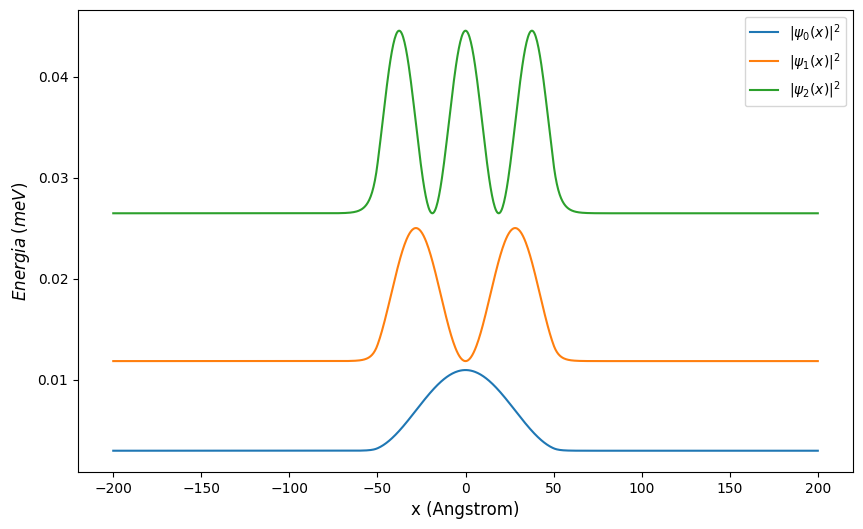

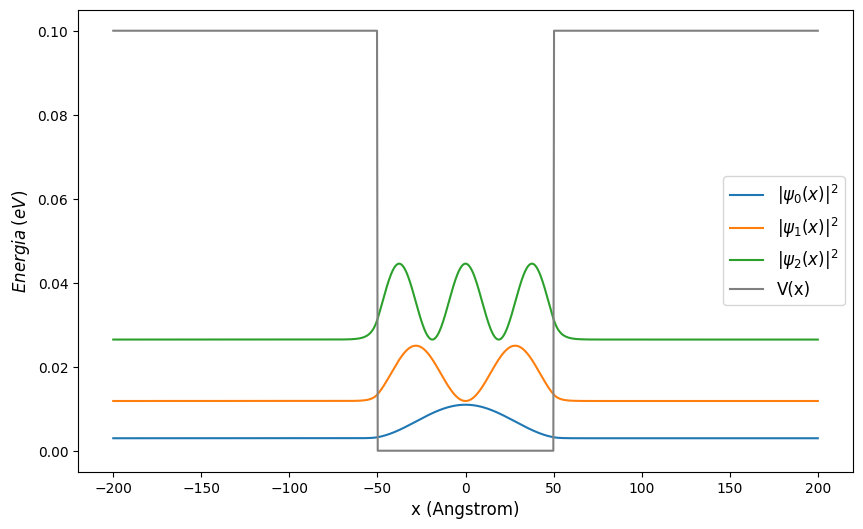


Hamiltonian info
Número de autoestados = 4
Formato do Hamiltoniano =  (1000, 1000)
Tamanho do Hamiltoniano =  1000000

System info
N = 1000
dx ( bohr ) = 0.7566584088213546 ; dx ( ang ) = 0.4004004004004004
Potencial = 100.0 (meV)
L (ang) = 100.0

Energias
E[0] =    2.9703 (meV)
E[1] =   11.8397 (meV)
E[2] =   26.4669 (meV)
E[3] =   46.5393 (meV)


In [83]:
#===========================================
#>>>>>>>>>>>>>>PROGRAMA PRINCIPAL<<<<<<<<<<<
#===========================================

import numpy as np                     # biblioteca de matrizes
import matplotlib.pyplot as plt        # biblioteca de gráfcos
from scipy.sparse.linalg import eigsh  # biblioteca para Diagonalizar a matriz hamiltoniana
from numba import njit                 # biblioteca de performace
from scipy import constants as cte     # biblioteca de constantes físicas
from scipy.sparse import diags         # biblioteca de cria uma matriz tridiagonal (sparse)

#===========================================
#>>>>>>>>>>>>>>>>>CONSTANTES<<<<<<<<<<<<<<<<
#===========================================

Ry = cte.value(u'Rydberg constant times hc in eV')          # Constante de Rydberg ---> eV
A0 = cte.value(u'Bohr radius')/cte.value(u'Angstrom star')  # Raio de Bohr ---> Angstroms 
k = 4                                                       # Número de autoenergias a serem encontradas
typem = np.float64
#===========================================
#>>>>>>>>>>>>>>>>>>>>GRID<<<<<<<<<<<<<<<<<<<
#===========================================

N = 1000                                # Números de pontos em x (pontos na grid)
xmin, xmax = (-200.,200.)
L = 100.                                # Tamanho do poço - angstrom
L_admensional  = L/A0                   # Tamanho do poço - adimensional
x,dx = np.linspace(xmin/A0,xmax/A0, N, retstep = True, dtype = typem)

V0 = 0.1                                # V0 em ---> eV

V = potencial(x, N, V0, L_admensional, typem)
H = hamiltoniana(V, N, dx, typem)
En, psi = diagonaliza(H, k)
norma = normaliza(psi, k, dx)
prob = np.abs(norma)**2
figura_sem_potencial =fig_densidade(k, x, En, prob)
figura_com_potencial = fig_densidade_potencial(k, x, En, prob)
dados = info(H, k)


